Try to pull down all the Five Guys and In N Outs in CA from Yelp API
Look at ratings across the state for these chains...how much do they vary,
which one has more ratings and which overall has higher ratings?

In [1]:
import requests
import pandas as pd

In [14]:
import json

#Our previous function for loading our api key file
def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [15]:
keys = get_keys("/Users/morgandj/.secret/creds.json")

api_key = keys['key']


In [4]:
def prepare_data(data_list):
    """
    This function takes in a list of dictionaries and prepares it
    for analysis
    """
    
    # Make a new list to hold results
    results = []
    
    for business_data in data_list:
    
        # Make a new dictionary to hold prepared data for this business
        prepared_data = {}
        
        # Extract name, review_count, rating, and price key-value pairs
        # from business_data and add to prepared_data
        # If a key is not present in business_data, add it to prepared_data
        # with an associated value of None
        bus_keys=business_data.keys()
        keys=['name','review_count','rating','price','id']
        for k in keys:
            if k in bus_keys:
                prepared_data[k]=business_data[k]
            else:
                prepared_data[k]=None
    
        # Parse and add latitude and longitude columns
        if 'coordinates' in bus_keys:
            coords=business_data['coordinates']
            prepared_data['latitude']=coords['latitude']
            prepared_data['longitude']=coords['longitude']
        else:
            prepared_data['latitude']=None
            prepared_data['longitude']=None
            
        #Add city and state
        if 'location' in bus_keys:
            prepared_data['city']=business_data['location']['city']
            prepared_data['state']=business_data['location']['state']
            prepared_data['zip_code']=business_data['location']['zip_code']
        else:
            prepared_data['state']=None
            prepared_data['city']=None
            prepared_data['zip_code']=None
        
        # Add to list if all values are present
        if all(prepared_data.values()):
            results.append(prepared_data)
    
    return results

# Search for Five Guys by City #

If you search for Five Guys using just CA in the location, it only returns restaurants in the center of the state since there are so many other restaurants returned that are related to Five Guys.  In order to capture every Five Guys in the state, I'll search by city, filter out restaurants that are not Five Guys, and then remove duplicates. 

I'll do an example search first using La Mesa, CA (in San Diego county) to give me an idea of how big of an area is returned for a city neighboring a larger city and to check my code.

In [26]:
url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

url_params = {
                'term': 'Five+Guys',
                'location': 'La+Mesa,+CA'
            }

In [27]:
response=requests.get(url,headers=headers,params=url_params)
response.status_code

200

In [28]:
resp_json=response.json()
resp_json.keys()

dict_keys(['businesses', 'total', 'region'])

In [29]:
resp_json['total']

493

In [30]:
prepared=prepare_data(resp_json['businesses'])
df=pd.DataFrame(prepared)
df

,name,review_count,rating,price,id,latitude,longitude,city,state,zip_code
0,Five Guys,234,3.5,$$,6yG9_kENOrFpUaHc7RGyNg,32.806280,-116.966232,El Cajon,CA,92020
1,Five Guys,318,3.5,$$,Xp4JLy_IE636zQqplp2w5A,32.748703,-117.158792,San Diego,CA,92103
2,Five Guys,196,3.5,$$,4fTOcIrimpyzqytLje18Tg,32.820620,-117.178996,San Diego,CA,92117
3,Five Guys,437,3.0,$$,oOj2yWSu1F-hCmy0C79npQ,32.867710,-117.214910,San Diego,CA,92122
4,Five Guys,193,3.0,$$,f8oqwONT4pCcBGsv44T4WQ,32.956146,-117.042705,Poway,CA,92064
5,Five Guys,50,2.5,$$,cNg5tajDEy7jNxtviQzwoA,32.630410,-117.087458,Chula Vista,CA,91910
6,Five Guys,62,3.0,$$,KrM1NoV92U-m1XIGxEBVKw,32.583732,-117.116100,Imperial Beach,CA,91932
7,Five Guys,54,3.5,$,JeJChOgVwliEqazlmCMk2Q,32.689997,-117.128225,San Diego,CA,92136
8,Five Guys,470,3.5,$$,N7hWCHXyPCUUXF-CAoMSeA,32.736750,-117.216375,San Diego,CA,92106
9,Five Guys,160,3.5,$$,XpXUTPuf5dFJ3pA3UprU8g,33.112460,-117.102790,Escondido,CA,92029


This covers La Mesa and quite a few of the surrounding cities.  Now, I'll write a script that loops through all the cities and concatenates all the results into a DataFrame.

## Get list of all cities in CA ##

BUT FIRST! Let's practice some webscraping and pull all the cities in CA off Wikipedia!

In [31]:
from bs4 import BeautifulSoup

In [33]:
cities_url='https://en.wikipedia.org/wiki/List_of_municipalities_in_California'
html_page=requests.get(cities_url)
soup=BeautifulSoup(html_page.content,'html.parser')

In [48]:
table=soup.find_all('table')
table[1]

<table class="wikitable plainrowheaders sortable">
<tbody><tr>
<th rowspan="2" scope="col">Name
</th>
<th rowspan="2" scope="col">Type
</th>
<th rowspan="2" scope="col">County
</th>
<th rowspan="2" scope="col">Population (2020)<sup class="noprint Inline-Template Template-Fact" style="white-space:nowrap;">[<i><a href="/wiki/Wikipedia:Citation_needed" title="Wikipedia:Citation needed"><span title="This claim needs references to reliable sources. (September 2021)">citation needed</span></a></i>]</sup>
</th>
<th rowspan="2" scope="col">Population (2010)<sup class="reference" id="cite_ref-Census_2010_7-1"><a href="#cite_note-Census_2010-7">[7]</a></sup>
</th>
<th rowspan="2" scope="col">Change
</th>
<th colspan="2" scope="col">Land area<sup class="reference" id="cite_ref-2020_Gazetteer_8-0"><a href="#cite_note-2020_Gazetteer-8">[8]</a></sup>
</th>
<th data-sort-type="number" rowspan="2" scope="col">Population density<sup class="reference" id="cite_ref-2020_Gazetteer_8-1"><a href="#cite_note

In [51]:
#we want the second table on the page, then all the 'th' where scope='row'
city_table=table[1]
table_body=city_table.find_all('th',{'scope':'row'})
table_body

[<th scope="row"><a href="/wiki/Adelanto,_California" title="Adelanto, California">Adelanto</a>
 </th>,
 <th scope="row"><a href="/wiki/Agoura_Hills,_California" title="Agoura Hills, California">Agoura Hills</a>
 </th>,
 <th scope="row"><a href="/wiki/Alameda,_California" title="Alameda, California">Alameda</a>
 </th>,
 <th scope="row"><a href="/wiki/Albany,_California" title="Albany, California">Albany</a>
 </th>,
 <th scope="row"><a href="/wiki/Alhambra,_California" title="Alhambra, California">Alhambra</a>
 </th>,
 <th scope="row"><a href="/wiki/Aliso_Viejo,_California" title="Aliso Viejo, California">Aliso Viejo</a>
 </th>,
 <th scope="row" style="background:#bfb;"><a href="/wiki/Alturas,_California" title="Alturas, California">Alturas</a><img alt="County seat" data-file-height="14" data-file-width="9" decoding="async" height="14" src="//upload.wikimedia.org/wikipedia/commons/3/37/Dagger-14-plain.png" width="9"/>
 </th>,
 <th scope="row"><a href="/wiki/Amador_City,_California" titl

In [54]:
#pull the city names out of all the th elements
cities=[c.text[:-1] for c in table_body]
cities

['Adelanto',
 'Agoura Hills',
 'Alameda',
 'Albany',
 'Alhambra',
 'Aliso Viejo',
 'Alturas',
 'Amador City',
 'American Canyon',
 'Anaheim',
 'Anderson',
 'Angels Camp',
 'Antioch',
 'Apple Valley',
 'Arcadia',
 'Arcata',
 'Arroyo Grande',
 'Artesia',
 'Arvin',
 'Atascadero',
 'Atherton',
 'Atwater',
 'Auburn',
 'Avalon',
 'Avenal',
 'Azusa',
 'Bakersfield',
 'Baldwin Park',
 'Banning',
 'Barstow',
 'Beaumont',
 'Bell',
 'Bell Gardens',
 'Bellflower',
 'Belmont',
 'Belvedere',
 'Benicia',
 'Berkeley',
 'Beverly Hills',
 'Big Bear Lake',
 'Biggs',
 'Bishop',
 'Blue Lake',
 'Blythe',
 'Bradbury',
 'Brawley',
 'Brea',
 'Brentwood',
 'Brisbane',
 'Buellton',
 'Buena Park',
 'Burbank',
 'Burlingame',
 'Calabasas',
 'Calexico',
 'California City',
 'Calimesa',
 'Calipatria',
 'Calistoga',
 'Camarillo',
 'Campbell',
 'Canyon Lake',
 'Capitola',
 'Carlsbad',
 'Carmel-by-the-Sea',
 'Carpinteria',
 'Carson',
 'Cathedral City',
 'Ceres',
 'Cerritos',
 'Chico',
 'Chino',
 'Chino Hills',
 'Chowchi

## Search Yelp API for Five Guys in CA by City ##

In [57]:
#write a function that takes a city name from CA and makes a request of Five 
#Guys in that area and returns a dataframe

def city_five_guys(city):
    location=city.replace(" ","+")+",+CA"
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    url_params = {
                'term': 'Five+Guys',
                'location': location
            }
    response=requests.get(url,headers=headers,params=url_params)
    if response.status_code != 200:
        return None
    else:
        resp_json=response.json()
        prepared=prepare_data(resp_json['businesses'])
        return pd.DataFrame(prepared)

In [58]:
#test function on La Mesa
city_five_guys('La Mesa')

,name,review_count,rating,price,id,latitude,longitude,city,state,zip_code
0,Five Guys,234,3.5,$$,6yG9_kENOrFpUaHc7RGyNg,32.806280,-116.966232,El Cajon,CA,92020
1,Five Guys,318,3.5,$$,Xp4JLy_IE636zQqplp2w5A,32.748703,-117.158792,San Diego,CA,92103
2,Five Guys,196,3.5,$$,4fTOcIrimpyzqytLje18Tg,32.820620,-117.178996,San Diego,CA,92117
3,Five Guys,437,3.0,$$,oOj2yWSu1F-hCmy0C79npQ,32.867710,-117.214910,San Diego,CA,92122
4,Five Guys,193,3.0,$$,f8oqwONT4pCcBGsv44T4WQ,32.956146,-117.042705,Poway,CA,92064
5,Five Guys,50,2.5,$$,cNg5tajDEy7jNxtviQzwoA,32.630410,-117.087458,Chula Vista,CA,91910
6,Five Guys,62,3.0,$$,KrM1NoV92U-m1XIGxEBVKw,32.583732,-117.116100,Imperial Beach,CA,91932
7,Five Guys,54,3.5,$,JeJChOgVwliEqazlmCMk2Q,32.689997,-117.128225,San Diego,CA,92136
8,Five Guys,470,3.5,$$,N7hWCHXyPCUUXF-CAoMSeA,32.736750,-117.216375,San Diego,CA,92106
9,Five Guys,160,3.5,$$,XpXUTPuf5dFJ3pA3UprU8g,33.112460,-117.102790,Escondido,CA,92029


In [59]:
#import time to add delays between the calls to cities
import time

In [60]:
#Loop through all the cities and add to df

df_five_guys=city_five_guys(cities[0])

for c in cities[1:]:
    new_city_df=city_five_guys(c)
    df_five_guys=pd.concat([df_five_guys,new_city_df])
    time.sleep(5)
print(df_five_guys.head())
df_five_guys.info()

        name  review_count  rating price                      id   latitude  \
0  Five Guys            95     3.5    $$  GOXHAbGroDlOf_zmqkC-kQ  34.426254   
1  Five Guys           167     3.5    $$  RSr6sG2U47Cg_xkn9WbHvw  34.150916   
2  Five Guys           388     3.5    $$  EiLnn-xBJ_OWrSVcRXfJcQ  34.109629   
3  Five Guys           172     3.0    $$  -7yU9As2bCjDMj6JRxxCLw  34.597767   
4  Five Guys           220     3.0     $  kwp6lomyAo2i0x076S8T6w  34.070632   

    longitude              city state zip_code  
0 -117.385764          Hesperia    CA    92344  
1 -117.475291           Fontana    CA    92336  
2 -117.575236  Rancho Cucamonga    CA    91730  
3 -118.146920          Palmdale    CA    93551  
4 -117.209405          Redlands    CA    92374  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8711 entries, 0 to 19
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8711 non-null   objec

## Select only Five Guys in CA ##

In [61]:
#Select all the rows that contain the substring 'Five Guys' in the case
#where some of the names are different

df_five_only=df_five_guys[df_five_guys['name'].str.contains('Five Guys')]
df_five_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4098 entries, 0 to 12
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4098 non-null   object 
 1   review_count  4098 non-null   int64  
 2   rating        4098 non-null   float64
 3   price         4098 non-null   object 
 4   id            4098 non-null   object 
 5   latitude      4098 non-null   float64
 6   longitude     4098 non-null   float64
 7   city          4098 non-null   object 
 8   state         4098 non-null   object 
 9   zip_code      4098 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 352.2+ KB


In [63]:
df_five_only['name'].value_counts()

Five Guys                      4083
Five Guys Burgers and Fries      15
Name: name, dtype: int64

These two names look like they are both the same chain. I will keep all restaurants with either of these names.

In [64]:
#check that they are all in CA

df_five_only['state'].value_counts()

CA    4074
NV      15
AZ       9
Name: state, dtype: int64

In [65]:
#remove restaurants that are in NV or AZ

df_five_only=df_five_only[df_five_only['state']=='CA']
df_five_only['state'].value_counts()

CA    4074
Name: state, dtype: int64

In [68]:
#remove duplicates by id
five_no_dups=df_five_only.drop_duplicates(subset='id')
five_no_dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 4
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          131 non-null    object 
 1   review_count  131 non-null    int64  
 2   rating        131 non-null    float64
 3   price         131 non-null    object 
 4   id            131 non-null    object 
 5   latitude      131 non-null    float64
 6   longitude     131 non-null    float64
 7   city          131 non-null    object 
 8   state         131 non-null    object 
 9   zip_code      131 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 11.3+ KB


The Five Guys website lists that there are 134 Five Guys restaurants in CA.  We are only missing 3, which is acceptable for this analysis...only 2% of all restaurants in the state.  If we wanted to try to capture all of them we could try searching by zipcode. It is also possible that these locations are not on Yelp.

## Check Other Names to Find Missing Restaurants ##

Before moving on, lets check if any of the restaurants are named with '5' instead of 'Five'

In [71]:
df_5_guys=df_five_guys[df_five_guys['name'].str.contains('5')]
df_5_guys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 8 to 19
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          21 non-null     object 
 1   review_count  21 non-null     int64  
 2   rating        21 non-null     float64
 3   price         21 non-null     object 
 4   id            21 non-null     object 
 5   latitude      21 non-null     float64
 6   longitude     21 non-null     float64
 7   city          21 non-null     object 
 8   state         21 non-null     object 
 9   zip_code      21 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.8+ KB


In [72]:
df_5_guys['name'].value_counts()

Slater's 50/50 - Huntington Beach    4
Slater's 50/50                       4
105 Noshery                          2
I 5 Cafe and Creamery                2
Slaters 50/50                        2
Big Jim's 395 Grill                  2
Tom's Famous Family Restaurant 25    1
Oceans 675 by Northwoods             1
5 Guys Burger and Fries              1
Slater’s 50/50                       1
The  5th  Quarter                    1
Name: name, dtype: int64

In [73]:
#Pull out '5 Guys Burger and Fries' and add to five_guys_only df
df_5=df_5_guys[df_5_guys['name']=='5 Guys Burger and Fries']
df_5

,name,review_count,rating,price,id,latitude,longitude,city,state,zip_code
18,5 Guys Burger and Fries,4,3.0,$$,nLhg57UOPLgJhaGt1hTLlw,34.068906,-117.933201,Tukwila,CA,98188


In [74]:
try_again=pd.concat([df_five_only,df_5])
check_dups=try_again.drop_duplicates(subset='id')
check_dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 18
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          132 non-null    object 
 1   review_count  132 non-null    int64  
 2   rating        132 non-null    float64
 3   price         132 non-null    object 
 4   id            132 non-null    object 
 5   latitude      132 non-null    float64
 6   longitude     132 non-null    float64
 7   city          132 non-null    object 
 8   state         132 non-null    object 
 9   zip_code      132 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 11.3+ KB


It appears we did miss one restaurant. We could keep searching for other names, but this will do for now.

In [75]:
#reassign five_no_dups to the new df with 132 restaurants
five_no_dups=check_dups

## Five Guys Stats ##

In [76]:
#look at the stats for the ratings column
five_no_dups['rating'].describe()

count    132.000000
mean       3.181818
std        0.334257
min        2.500000
25%        3.000000
50%        3.000000
75%        3.500000
max        4.500000
Name: rating, dtype: float64

In [77]:
#look at the stats for the review counts column
five_no_dups['review_count'].describe()

count     132.000000
mean      207.530303
std       175.088394
min         4.000000
25%        93.000000
50%       169.500000
75%       267.750000
max      1042.000000
Name: review_count, dtype: float64

The Mean Rating for Five Guys in CA is 3.18 and the Median is 3.0.  Average number of reviews per restaurant is 207 with the Median at 170.

# Search for In-N-Out by City #

Now that we have found all of the Five Guys, let's shift gears and find all of the In-N-Outs.  We'll use the same process, but we'll have to be careful when filtering by names to make sure we don't exclude any, since the name is a little funky.

In [80]:
#update my function to search for In-N-Out.  I could have added a second 
#parameter to the function for restaurant so I didn't have to rewrite it, 
#but this works too.

def city_in_out(city):
    location=city.replace(" ","+")+",+CA"
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    url_params = {
                'term': 'In-N-Out',
                'location': location
            }
    response=requests.get(url,headers=headers,params=url_params)
    if response.status_code != 200:
        return None
    else:
        resp_json=response.json()
        prepared=prepare_data(resp_json['businesses'])
        return pd.DataFrame(prepared)

In [81]:
#Test the function on La Mesa, California

city_in_out('La Mesa')

,name,review_count,rating,price,id,latitude,longitude,city,state,zip_code
0,In-N-Out Burger,304,4.0,$,dtGooYbqooLfhjBfWgdd_g,32.744208,-117.043248,Lemon Grove,CA,91945
1,In-N-Out Burger,241,4.0,$,UiaRCW4KJJb2hhW9mOpeiw,32.808024,-116.962886,El Cajon,CA,92020
2,In-N-Out Burger,758,4.0,$,7vKM74ULWQAC_vtDTPE9_Q,32.769479,-117.143443,San Diego,CA,92108
3,In-N-Out Burger,450,4.0,$,-SLLZLHrZUlwn9TpNT2RcQ,32.819629,-117.148682,San Diego,CA,92111
4,In-N-Out Burger,388,4.0,$,dicQYYpgnmLVI49BPVJBEA,32.620487,-116.962043,Chula Vista,CA,91915
5,In-N-Out Burger,203,4.5,$,ml2HxL-8HjBmNO7L1ReTbA,32.839017,-116.993888,Santee,CA,92071
6,In-N-Out Burger,416,4.0,$,1DWPh8LtmcsBwgkqHiU2aw,32.659664,-117.106586,National City,CA,91950
7,In-N-Out Burger,708,4.0,$,yQT6kcP5WE5152109M98dg,32.751933,-117.205325,San Diego,CA,92110
8,In-N-Out Burger,570,4.0,$,edGA76m7YnevCnCUIcyF5g,32.808964,-117.218870,Pacific Beach,CA,92109
9,In-N-Out Burger,553,4.0,$,S6Wb70Tvw3xQVvQnBqKP_Q,32.917685,-117.121940,San Diego,CA,92126


It looks like it worked and that 'In-N-Out' is a common spelling for the restaurant in the Yelp API.

## Search Yelp API for In-N-Out by city ##

In [83]:
df_in_out=city_in_out(cities[0])

for c in cities[1:]:
    new_city_df=city_in_out(c)
    df_in_out=pd.concat([df_in_out,new_city_df])

print(df_in_out.head())
df_in_out.info()

              name  review_count  rating price                      id  \
0  In-N-Out Burger           156     3.5     $  _9OzdwZCzgUSFbfbEESgRA   
1  In-N-Out Burger           219     4.5     $  ZnIpRBI_JDJaIRjHm3eV0g   
2  In-N-Out Burger            82     4.0     $  n6wTAZVkOnVWTy4WmSFVfw   
3  In-N-Out Burger           459     4.0     $  XKTr6a9Ady6mbUUMNqcDlQ   
4  In-N-Out Burger           206     4.0     $  faxXTR_fypr81HagZrdoCQ   

    latitude   longitude         city state zip_code  
0  34.521118 -117.322021  Victorville    CA    92394  
1  34.427108 -117.378146     Hesperia    CA    92345  
2  34.470502 -117.290924     Hesperia    CA    92345  
3  34.850064 -117.082381      Barstow    CA    92311  
4  34.704414 -118.166982    Lancaster    CA    93536  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8775 entries, 0 to 19
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8775 non-null  

In [84]:
#filter out In-N-Outs...first check to see if there are diff naming conventions
outs=df_in_out[df_in_out['name'].str.contains('out')]
print(outs.shape)
outs['name'].value_counts()

(18, 10)


Big Mouth Burgers                            5
Hidden Spot - South San Francisco            4
Stout Burgers & Beers                        4
The Lookout Bar & Grill                      2
South of the Border                          1
Chicken In A Barrel BBQ- South Lake Tahoe    1
Del's Hideout                                1
Name: name, dtype: int64

In [85]:
in_out_only=df_in_out[df_in_out['name'].str.contains('In-N-Out')]
in_out_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 11
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          3983 non-null   object 
 1   review_count  3983 non-null   int64  
 2   rating        3983 non-null   float64
 3   price         3983 non-null   object 
 4   id            3983 non-null   object 
 5   latitude      3983 non-null   float64
 6   longitude     3983 non-null   float64
 7   city          3983 non-null   object 
 8   state         3983 non-null   object 
 9   zip_code      3983 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 342.3+ KB


In [86]:
in_out_only['name'].value_counts()

In-N-Out Burger    3983
Name: name, dtype: int64

In [87]:
#drop duplicates
in_out_no_dups=in_out_only.drop_duplicates(subset='id')
in_out_no_dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 4
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          256 non-null    object 
 1   review_count  256 non-null    int64  
 2   rating        256 non-null    float64
 3   price         256 non-null    object 
 4   id            256 non-null    object 
 5   latitude      256 non-null    float64
 6   longitude     256 non-null    float64
 7   city          256 non-null    object 
 8   state         256 non-null    object 
 9   zip_code      256 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 22.0+ KB


In [88]:
#Check to see which states they are in
in_out_no_dups['state'].value_counts()

CA    249
NV      4
AZ      3
Name: state, dtype: int64

In [89]:
#Remove stores in NV and AZ
in_out_no_dups=in_out_no_dups[in_out_no_dups['state']=='CA']
in_out_no_dups.shape

(249, 10)

In-N-Out website says there are 255 stores in CA...we are missing 2%...similar to Five Guys.  This will be acceptable for this analysis.

## In-N-Out Stats ##

In [90]:
in_out_no_dups['rating'].describe()

count    249.000000
mean       3.891566
std        0.280928
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        4.500000
Name: rating, dtype: float64

In [91]:
in_out_no_dups['review_count'].describe()

count     249.000000
mean      293.526104
std       226.258952
min        17.000000
25%       174.000000
50%       240.000000
75%       347.000000
max      1854.000000
Name: review_count, dtype: float64

In-N-Out has a mean rating of 3.89 and mean of 4.0.  Notable the 25th percentile is at 4.0 as well. The mean number of ratings is 293 with the median at 240.

# Five Guys vs. In-N-Out #

We'll look at distribution of ratings and review_counts for the two restaurants with histograms.  I'll also look at correlation between review counts and ratings for each restaurant with scatter plots.

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

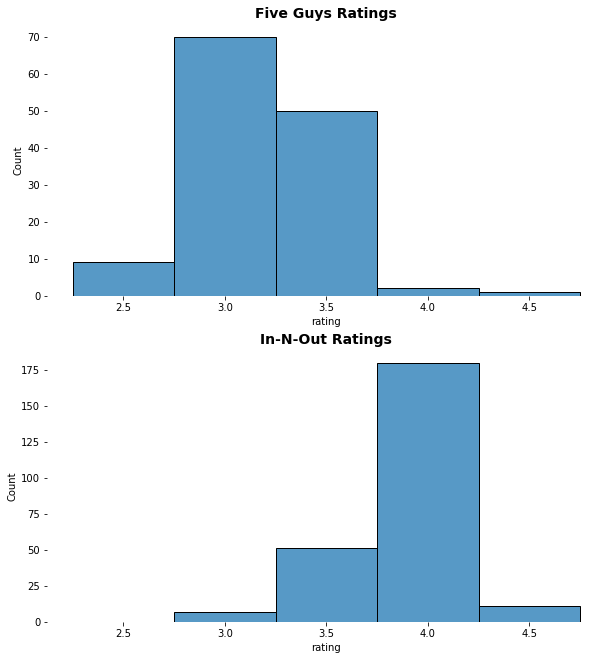

In [131]:
#Create two vertically stacked histograms for ratings distribution
fig,ax=plt.subplots(2,1,figsize=(10,11))
ax[0].set_title('Five Guys Ratings',fontdict={'fontsize':14,'fontweight':'bold'})
ax[0].set_frame_on(False)
sns.histplot(five_no_dups['rating'],ax=ax[0],bins=5,binrange=(2.25,4.75))
ax[1].set_title('In-N-Out Ratings',fontdict={'fontsize':14,'fontweight':'bold'})
ax[1].set_frame_on(False)
sns.histplot(in_out_no_dups['rating'],ax=ax[1],bins=5,binrange=(2.25,4.75))
plt.savefig('Ratings.png')

We can see that the majority of In-N-Out Ratings are focused around 4.0 with very few at 3.0. On the other hand Five Guys ratings tend to fall between 3.0-3.5 with few at the 4.0 level. In-N-Out is consistently rated 0.5-1.0 stars higher than Five Guys in CA.

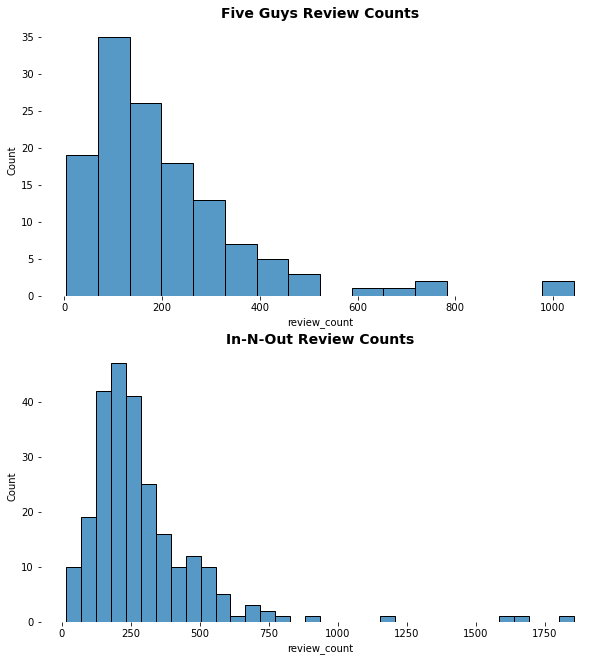

In [133]:
#Create two vertically stacked histograms for review count distribution
fig,ax=plt.subplots(2,1,figsize=(10,11))
ax[0].set_title('Five Guys Review Counts',fontdict={'fontsize':14,'fontweight':'bold'})
ax[0].set_frame_on(False)
sns.histplot(five_no_dups['review_count'],ax=ax[0])
ax[1].set_title('In-N-Out Review Counts',fontdict={'fontsize':14,'fontweight':'bold'})
ax[1].set_frame_on(False)
sns.histplot(in_out_no_dups['review_count'],ax=ax[1])
plt.savefig('Review_count.png')

Comparing review counts is interesting just to see how many more ppl bothered to review In-N-Out. Both have a right skew, but the average for Five Guys tends to be lower per restaurant by at least 50 reviews than In-N-Out.

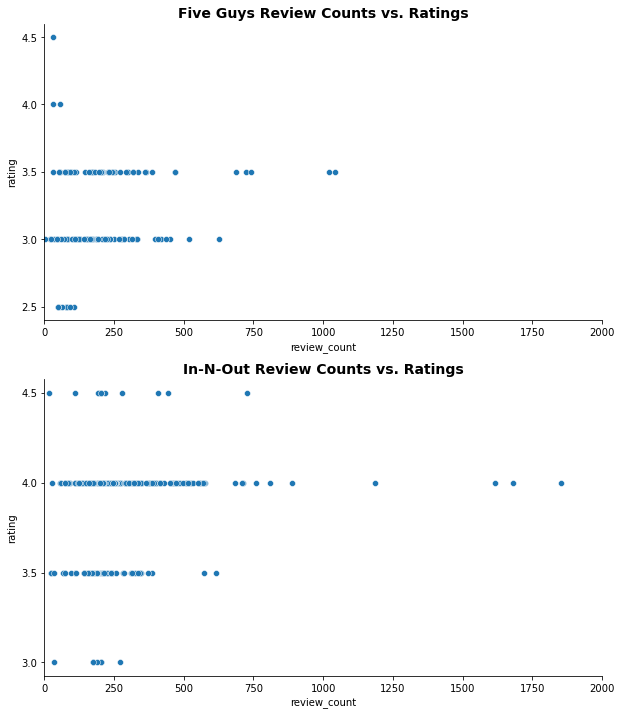

In [138]:
#Show correlation between review count and rating for each of the chains
fig,ax=plt.subplots(2,1,figsize=(10,12))
ax[0].set_title('Five Guys Review Counts vs. Ratings',fontdict={'fontsize':14,'fontweight':'bold'})
ax[0].set_xlim(left=0,right=2000)
ax[0].set_yticks([2.5,3.0,3.5,4.0,4.5])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
sns.scatterplot(x=five_no_dups['review_count'], 
                y=five_no_dups['rating'],ax=ax[0])
ax[1].set_title('In-N-Out Review Counts vs. Ratings',fontdict={'fontsize':14,'fontweight':'bold'})
ax[1].set_xlim(left=0,right=2000)
ax[1].set_yticks([2.5,3.0,3.5,4.0,4.5])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
sns.scatterplot(x=in_out_no_dups['review_count'],y=in_out_no_dups['rating'],ax=ax[1])
plt.savefig('review_count_vs_rating.png')

For both restaurants, higher review counts tend to have ratings closer to the average.  Five Guys' highest ratings have the lowest number of review counts (all less than ~100), but In-N-Out has more high (4.5) ratings above 250.

# Conclusions #

In-N-Out is the clear winner in California, but this is not necessarily surprising since this chain was founded in California while Five Guys was founded on the East Coast.  In-N-Out also just seems more popular since there are consistently more reviews of its restaurants.  One would need to compare the two chains across all states that they both operate in to get a clearer picture and even then, In-N-Out does not operate in Five Guys' original market, so taste preferences for the West Coast could be a driving factor with different outcomes if customers from the East Coast tried both burgers.